In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import plotly as pt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
import os
path = os.getcwd() + "\\results.csv"
data = pd.read_csv(path)
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Preprocessing

In [3]:
data.isnull().sum()
#No any missing values

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [4]:
#check for missing values
print("number of missing values: ",data.isnull().sum().sum())

number of missing values:  0


In [5]:
data.describe()

,home_score,away_score
count,42082.000000,42082.000000
mean,1.743691,1.186541
std,1.752459,1.403957
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


([<matplotlib.axis.XTick at 0x163f2ed5a20>,
 <a list of 2 Text xticklabel objects>)

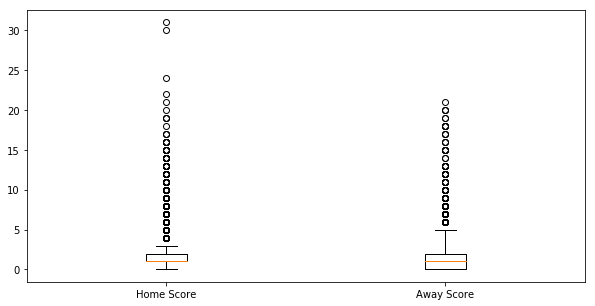

In [6]:
#finding outliers in the numerical data columns

fig = plt.figure(figsize =(10, 5))
plt.boxplot([data["home_score"],data["away_score"]])
plt.xticks([1,2], ["Home Score", "Away Score"])

In [7]:
#Boxplot says there are many outliers
#Let's remove those outlier,It will make our Machine Learning model more accurate
#Asume maximum goals that one team can score is 15

higher_home=15
higher_away=15
data=data[(data["home_score"]<higher_home) & (data["away_score"]<higher_away)]
data.head(5)
#Dataset after removing outliers

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [8]:
#making new three columns are winner, loser and draw
data["winner"]=data["home_score"]-data["away_score"]
data["loser"]=data["winner"]
data["draw"]=data["winner"]

In [9]:
for x in range(0,data.shape[0]):
    if data.iloc[x,9]>0:
        data.iloc[x,9]=data.iloc[x,1]
        data.iloc[x,10]=data.iloc[x,2]
        data.iloc[x,11]=False
    elif data.iloc[x,9]<0:
        data.iloc[x,9]=data.iloc[x,2]
        data.iloc[x,10]=data.iloc[x,1]
        data.iloc[x,11]=False
    else :
        data.iloc[x,9]=float("Nan")
        data.iloc[x,10]=float("Nan")
        data.iloc[x,11]=True

In [10]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,draw
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,NaN,True
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,NaN,True
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,False


In [11]:
#Making a new colum named "Win_Statues" to store the result(Win,Lost,Draw) of the home team

conditions  = [data["home_score"] ==data["away_score"], data["home_score"] > data["away_score"] , data["home_score"] < data["away_score"]]
choices     = [ "Draw", 'Win', 'Lost' ]
data["Win_Statues"] = np.select(conditions, choices)
data.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,draw,Win_Statues
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,NaN,True,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,False,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,False,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,NaN,True,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,False,Win


In [12]:
#See what are the Countries in the dataset

countries=data.home_team.unique()
print(f"There are {len(countries)} Countries in the home_team Column\n")
print(f"Countries-{countries}")

There are 306 Countries in the home_team Column

Countries-['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Netherlands'
 'Czechoslovakia' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Paraguay' 'Japan' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'Yugoslavia'
 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia'
 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico'
 'Aruba' 'Egypt' 'Haiti' 'Philippines' 'Bulgaria' 'Jamaica' 'Kenya'
 'Bolivia' 'Peru' 'Honduras' 'Guyana' 'Uganda' 'Belarus' 'El Salvador'
 'Barbados' 'Republic of Ireland' 'Trinidad and Tobago' 'Greece' 'Curaçao'
 'Dominica' 'Silesia' 'Guadeloupe' 'Israel' 'Suriname' 'French Guiana'
 'Cuba' 'Colombia' 'Ecuador' 'Saint Kitts and Nevis' 'Panama' 'Slovakia'
 'Manchukuo' 'Croatia' 'Nicaragua' 'Afghan

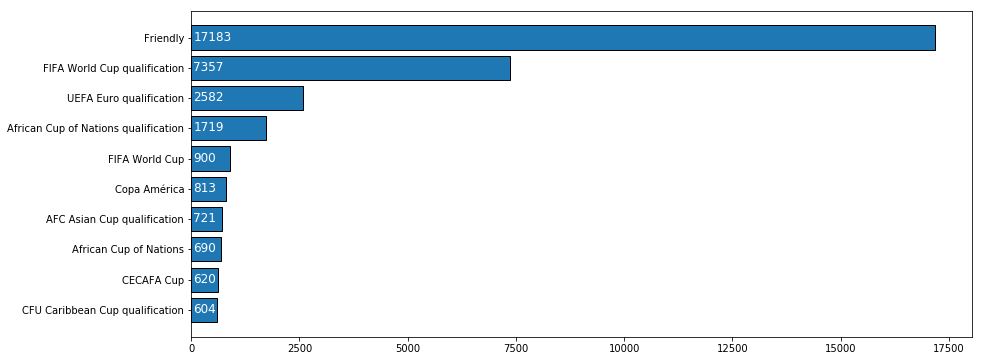

In [13]:
#type of the Matches
rank_bound = 10
ax = data.tournament.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=50,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

#Most Played tournament is Friendly 

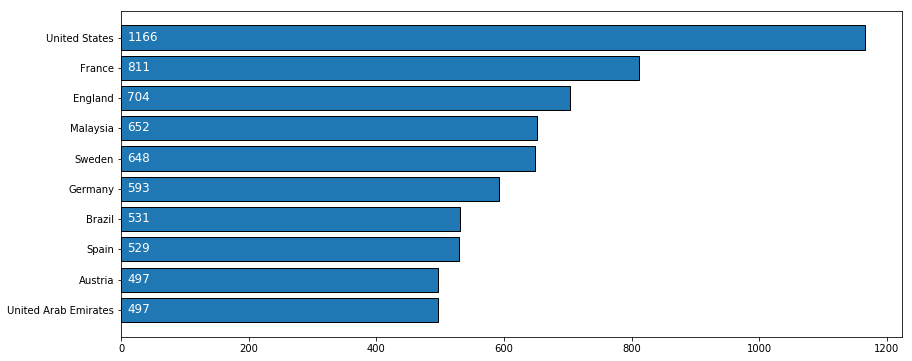

In [14]:
#Teams played most Matches
rank_bound = 10
ax = data.country.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=10,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

#United States played most matches

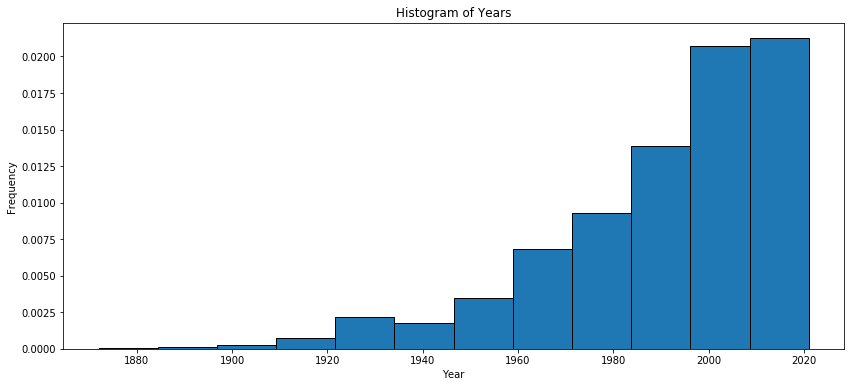

In [15]:
#Number of Matches played in equal intervals
years = []
for date in data.date:
    years.append(int(str(date)[0:4]))
plt.figure(figsize=(14,6))
plt.hist(years, density=True, bins=12, edgecolor="k")
plt.title("Histogram of Years")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.show()

#Most matches are played after 1960


In [16]:
#Now take the rpws that home_team==Country 
#Nad romove the data of friendly matches

data_home=data.loc[data["home_team"]==data["country"] ]
data_home=data.loc[data["tournament"] != "Friendly"]
data_home.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,draw,Win_Statues
29,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,Scotland,Northern Ireland,False,Lost
30,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,Wales,Northern Ireland,False,Win
31,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,England,Northern Ireland,False,Lost
32,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,Scotland,England,False,Win
33,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,England,Wales,False,Lost


In [17]:
#How home team performs in tournament matches

tournament_df=pd.crosstab(data_home["tournament"], data_home["Win_Statues"],margins=True)
tournament_df=tournament_df.sort_values("All",ascending=False).head(10)
tournament_df.style.bar(color="brown",subset=["Draw","Lost","Win","All"])

Win_Statues,Draw,Lost,Win,All
tournament,,,,
All,5388,7111,12350,24849
FIFA World Cup qualification,1570,2000,3787,7357
UEFA Euro qualification,506,815,1261,2582
African Cup of Nations qualification,418,353,948,1719
FIFA World Cup,199,290,411,900
Copa América,172,225,416,813
AFC Asian Cup qualification,123,174,424,721
African Cup of Nations,193,186,311,690
CECAFA Cup,147,185,288,620


In [18]:
#Win Statues
data_home['Win_Statues'].value_counts()

Win     12350
Lost     7111
Draw     5388
Name: Win_Statues, dtype: int64

In [19]:
#How each team perform while playing a tournament in home grounds

teams_win_statues=pd.crosstab(data["home_team"], data["Win_Statues"],margins=True, margins_name="Total")
teams_win_statues["team_win_probability"]=teams_win_statues["Win"]/(teams_win_statues["Total"])
#Lets take teams which plays atleast 200 games
teams_win_statues_100=teams_win_statues.loc[teams_win_statues["Total"]>200]
teams_win_statues_100=teams_win_statues_100.sort_values("team_win_probability",ascending=False)
teams_win_statues_100.head(20).style.bar(color="orange",subset="team_win_probability")

#We can see teams has more than 50% wining probability while playing in the home grounds 
#Brazil has most win probability in home_team

Win_Statues,Draw,Lost,Win,Total,team_win_probability
home_team,,,,,
Brazil,108,56,406,570,0.712281
Spain,66,49,249,364,0.684066
Argentina,120,68,362,550,0.658182
Ivory Coast,64,35,175,274,0.638686
Iran,61,42,177,280,0.632143
Nigeria,67,33,171,271,0.630996
Egypt,68,74,239,381,0.627297
Italy,119,49,281,449,0.625835
Germany,109,84,320,513,0.623782


In [20]:
#Teams playing in away conditions

teams_away_statues=pd.crosstab(data["away_team"], data["Win_Statues"],margins=True, margins_name="Total")
teams_away_statues["team_win_probability"]=teams_away_statues["Lost"]/(teams_away_statues["Total"])
#Lets take teams which plays atleast 200 games
teams_away_statues_100=teams_away_statues.loc[teams_away_statues["Total"]>200]
teams_away_statues_100=teams_away_statues_100.sort_values("team_win_probability",ascending=False)
teams_away_statues_100.rename(columns={'Lost': 'Win'}, index={'Win': 'Lost'}, inplace=True)
teams_away_statues_100.head(20)

#The probability to wining a tournament in away conditions is very low comapred to the winning probalities in home conditions
#Brazil has most win probability in away_team

Win_Statues,Draw,Win,Win,Total,team_win_probability
away_team,,,,,
Brazil,91,223,101,415,0.537349
Germany,89,240,119,448,0.535714
England,134,266,115,515,0.516505
Spain,97,162,82,341,0.475073
South Korea,110,177,109,396,0.446970
Netherlands,81,163,129,373,0.436997
Russia,115,175,111,401,0.436409
Iran,67,96,57,220,0.436364
Japan,53,111,93,257,0.431907


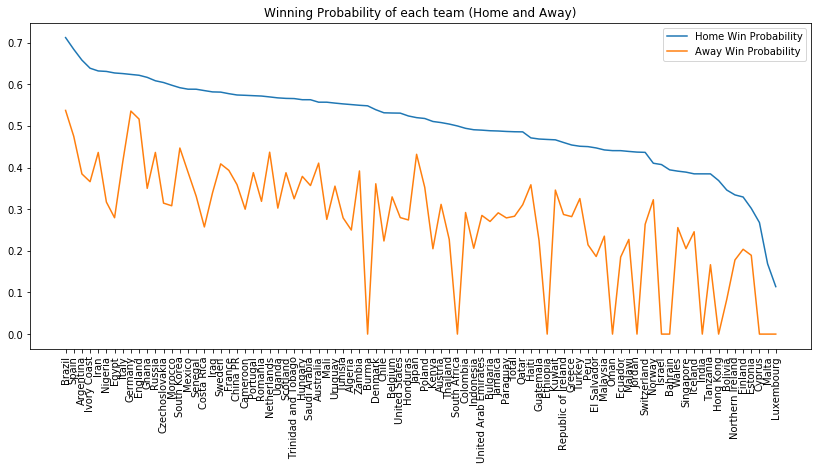

In [21]:
#Making a plot to identify wining possibilities in both home and away conditions

win_prob={teams_win_statues_100.iloc[i,:].name:[teams_win_statues_100.iloc[i,4]] for i in range(teams_win_statues_100.shape[0])}
for i in range(teams_away_statues_100.shape[0]):
    try:
        win_prob[teams_away_statues_100.iloc[i,:].name].append(teams_away_statues_100.iloc[i,4]) 
    except:
        pass
country_names=win_prob.keys()
lst_home=[i[0] for i in win_prob.values()]
lst_away=[]
for i in win_prob.values():
    if len(i)==2:
        lst_away.append(i[1])
    else:
        lst_away.append(0)

plt.figure(figsize=(14,6))
plt.plot(country_names,lst_home, label = "Home Win Probability")
plt.plot(country_names, lst_away, label = "Away Win Probability")
plt.xticks(rotation = 90)
plt.title("Winning Probability of each team (Home and Away)")
plt.legend()
plt.show()

In [22]:
#Winner Column
data["winner"].value_counts()

#Brazil has most number of wins

Brazil            629
England           580
Germany           560
Argentina         529
Sweden            506
                 ... 
Timor-Leste         1
Surrey              1
Two Sicilies        1
Chagos Islands      1
Saarland            1
Name: winner, Length: 300, dtype: int64

In [23]:
data["winner"].value_counts().loc["Brazil"]

629

In [24]:
#tournament column
data["tournament"].value_counts()

Friendly                                17183
FIFA World Cup qualification             7357
UEFA Euro qualification                  2582
African Cup of Nations qualification     1719
FIFA World Cup                            900
                                        ...  
Dragon Cup                                  4
OSN Cup                                     4
Copa América qualification                  2
Atlantic Heritage Cup                       2
AFF Championship qualification              2
Name: tournament, Length: 112, dtype: int64

In [25]:
#Countries and number of matches
away=data["away_team"].value_counts()
home=data["home_team"].value_counts()
for x in away.index:
    if x not in home.index:
        home[x]=0
for x in home.index:
    if x not in away.index:
        away[x]=0        
total=home+away
total.sort_values(ascending=False).to_frame(name="Number of Matches").style.background_gradient(cmap="icefire")

,Number of Matches
Sweden,1030
England,1020
Brazil,985
Argentina,984
Germany,961
Hungary,943
Uruguay,889
Mexico,875
South Korea,864
France,851


In [26]:
#wins
wins=data["winner"].value_counts().iloc[0:]
for x in total.index:
    if x not in wins.index:
        wins[x]=0
total_wins=pd.concat([total,wins],axis=1).rename(columns={0:"Matches","winner":"Wins"})
total_wins.sort_values("Wins",ascending=False).style.bar(color="orange",subset="Matches")

,Matches,Wins
Brazil,985,629
England,1020,580
Germany,961,560
Argentina,984,529
Sweden,1030,506
South Korea,864,454
Mexico,875,443
Hungary,943,442
Italy,812,431
France,851,425


In [27]:
#Total wins
total_wins["losses"]=data["loser"].value_counts()
total_wins["draws"]=total_wins["Matches"]-total_wins["losses"]-total_wins["Wins"]

In [28]:
#Country-wise wins
data1=dict(type="choropleth",
         locations=total_wins.index,
         locationmode="country names",
          colorscale="electric",
          z=total_wins["Wins"],
          colorbar={"title":"Number of Wins"},
          text="wins"
         )
lay=dict(title="Country-wise wins",geo=dict(scope="world"))
ma=go.Figure(data=[data1],layout=lay)
iplot(ma)

In [29]:
#Under the tournament FIFA World Cup
data2 = data.loc[data['tournament'].isin(['FIFA World Cup'])]
data2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,draw,Win_Statues
1315,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States,Belgium,False,Lost
1316,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,France,Mexico,False,Win
1317,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,Yugoslavia,Brazil,False,Lost
1318,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,Romania,Peru,False,Lost
1319,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Argentina,France,False,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39966,2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False,NaN,NaN,True,Draw
39967,2018-07-10,France,Belgium,1,0,FIFA World Cup,St. Petersburg,Russia,True,France,Belgium,False,Win
39968,2018-07-11,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True,Croatia,England,False,Win
39969,2018-07-14,Belgium,England,2,0,FIFA World Cup,St. Petersburg,Russia,True,Belgium,England,False,Win


In [30]:
#Split the date
data["date"]=pd.to_datetime(data["date"],infer_datetime_format=True)
data["year"]=data["date"].apply(lambda x: x.year)
data["month"]=data["date"].apply(lambda x: x.month)
data["day"]=data["date"].apply(lambda x: x.day)

In [31]:
#Number of World Cups hosted
ser=data.groupby(["tournament","year"])["country"].value_counts()["FIFA World Cup"]
temp=pd.concat([ser.index.get_level_values(1).value_counts(),data[data["tournament"]=="FIFA World Cup"].groupby("country")["year"].unique()],axis=1)
data3=dict(type="choropleth",
          locations=temp.index,
          locationmode="country names",
          z=temp["country"],
          colorbar={"title":"Number of World Cups"},
          text=temp["year"]
         )
layout=dict(title="Number of World Cups hosted",geo={"scope":"world"})
ma=go.Figure(data=[data3],layout=layout)
iplot(ma)


In [32]:
#United States win or loss in FIFA World Cup
data[(data["country"]=="United States") & (data["tournament"]=="FIFA World Cup")]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,draw,Win_Statues,year,month,day
18383,1994-06-17,Germany,Bolivia,1,0,FIFA World Cup,Chicago,United States,True,Germany,Bolivia,False,Win,1994,6,17
18384,1994-06-17,Spain,South Korea,2,2,FIFA World Cup,Dallas,United States,True,NaN,NaN,True,Draw,1994,6,17
18385,1994-06-18,Colombia,Romania,1,3,FIFA World Cup,Pasadena,United States,True,Romania,Colombia,False,Lost,1994,6,18
18386,1994-06-18,Italy,Republic of Ireland,0,1,FIFA World Cup,East Rutherford,United States,True,Republic of Ireland,Italy,False,Lost,1994,6,18
18387,1994-06-18,United States,Switzerland,1,1,FIFA World Cup,Pontiac,United States,False,NaN,NaN,True,Draw,1994,6,18
18388,1994-06-19,Belgium,Morocco,1,0,FIFA World Cup,Orlando,United States,True,Belgium,Morocco,False,Win,1994,6,19
18389,1994-06-19,Cameroon,Sweden,2,2,FIFA World Cup,Pasadena,United States,True,NaN,NaN,True,Draw,1994,6,19
18390,1994-06-19,Norway,Mexico,1,0,FIFA World Cup,Washington,United States,True,Norway,Mexico,False,Win,1994,6,19
18391,1994-06-20,Brazil,Russia,2,0,FIFA World Cup,Palo Alto,United States,True,Brazil,Russia,False,Win,1994,6,20
18392,1994-06-20,Netherlands,Saudi Arabia,2,1,FIFA World Cup,Washington,United States,True,Netherlands,Saudi Arabia,False,Win,1994,6,20


In [33]:
#Most Played Tournaments in the World
temp1=data.groupby("tournament")["home_team"].count().sort_values(ascending=False)[:20]
data4=dict(type="pie",
          labels=temp1.index,
          values=temp1,
          hole=0.3,
          name="Tournaments",
          hoverinfo="label+percent+value"
         )
layout=dict(title="Most Played Tournaments")
iplot(go.Figure(data=[data4],layout=layout))

#Friendly tournament is the hight 

In [34]:
total_wins.head()

,Matches,Wins,losses,draws
Abkhazia,28,12,4.0,12.0
Afghanistan,111,30,57.0,24.0
Albania,342,90,181.0,71.0
Alderney,19,3,16.0,0.0
Algeria,508,215,152.0,141.0


Text(0.5, 1.0, 'Average goals scored in home games')

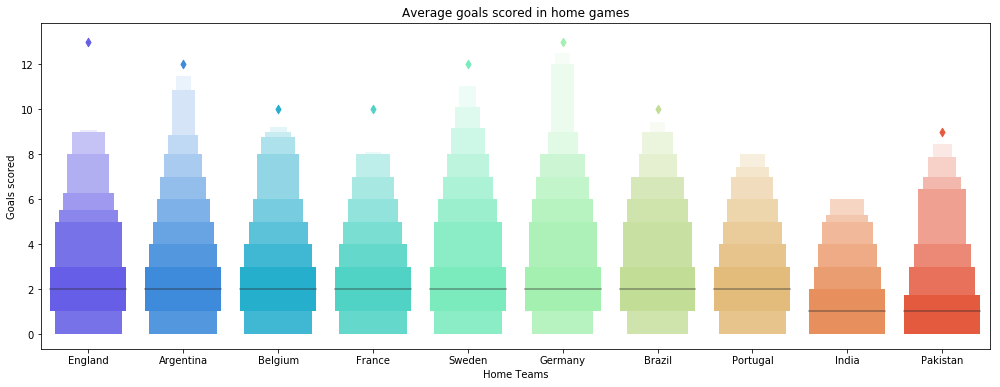

In [35]:
# Average goals scored in home games
temp2=data[(data["home_team"]=="Germany") | (data["home_team"]=="England") | (data["home_team"]=="Brazil") |
       (data["home_team"]=="France") | (data["home_team"]=="Sweden") | (data["home_team"]=="Argentina") |
       (data["home_team"]=="Portugal") | (data["home_team"]=="India") | (data["home_team"]=="Pakistan") |(data["home_team"]=="Belgium")]
plt.figure(figsize=(17,6))
sns.boxenplot(x=temp2["home_team"],y=temp2["home_score"],scale="linear",palette="rainbow")
plt.xlabel("Home Teams")
plt.ylabel("Goals scored")
plt.title("Average goals scored in home games")
#data[data["home_team"]=="Germany"]["home_score"].plot.box(showfliers=True,cmap="winter",patch_artist=True)

In [36]:
#In this question, Overall conclusion is Brazil is the most winning team in the hosting. Brazil has the hight chance to winning the matches compare to other countries. 

Question 02

In [37]:
#How each team perform while playing a tournament in home grounds

teams_win_statues=pd.crosstab(data["home_team"], data["Win_Statues"],margins=True, margins_name="Total")
teams_win_statues["team_win_probability"]=teams_win_statues["Win"]/(teams_win_statues["Total"])
#Lets take teams which plays atleast 200 games
teams_win_statues_100=teams_win_statues.loc[teams_win_statues["Total"]>200]
teams_win_statues_100=teams_win_statues_100.sort_values("team_win_probability",ascending=False)
teams_win_statues_100.head(20).style.bar(color="orange",subset="team_win_probability")

#We can see teams has more than 50% wining probability while playing in the home grounds 
#Brazil has most win probability in home_team

Win_Statues,Draw,Lost,Win,Total,team_win_probability
home_team,,,,,
Brazil,108,56,406,570,0.712281
Spain,66,49,249,364,0.684066
Argentina,120,68,362,550,0.658182
Ivory Coast,64,35,175,274,0.638686
Iran,61,42,177,280,0.632143
Nigeria,67,33,171,271,0.630996
Egypt,68,74,239,381,0.627297
Italy,119,49,281,449,0.625835
Germany,109,84,320,513,0.623782


In [38]:
#Teams playing in away conditions

teams_away_statues=pd.crosstab(data["away_team"], data["Win_Statues"],margins=True, margins_name="Total")
teams_away_statues["team_win_probability"]=teams_away_statues["Lost"]/(teams_away_statues["Total"])
#Lets take teams which plays atleast 200 games
teams_away_statues_100=teams_away_statues.loc[teams_away_statues["Total"]>200]
teams_away_statues_100=teams_away_statues_100.sort_values("team_win_probability",ascending=False)
teams_away_statues_100.rename(columns={'Lost': 'Win'}, index={'Win': 'Lost'}, inplace=True)
teams_away_statues_100.head(20)

#The probability to wining a tournament in away conditions is very low comapred to the winning probalities in home conditions
#Brazil has most win probability in away_team

Win_Statues,Draw,Win,Win,Total,team_win_probability
away_team,,,,,
Brazil,91,223,101,415,0.537349
Germany,89,240,119,448,0.535714
England,134,266,115,515,0.516505
Spain,97,162,82,341,0.475073
South Korea,110,177,109,396,0.446970
Netherlands,81,163,129,373,0.436997
Russia,115,175,111,401,0.436409
Iran,67,96,57,220,0.436364
Japan,53,111,93,257,0.431907


Text(0, 0.5, 'Results for Germany')

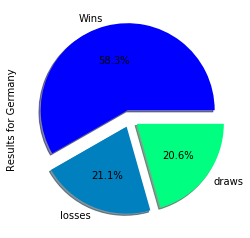

In [39]:
#Results of Germany 
ax=total_wins.loc["Germany"][1:].plot.pie(explode=[0.1,0.1,0.1],shadow=True,cmap="winter",autopct="%.1f%%")
ax.set_ylabel("Results for Germany")

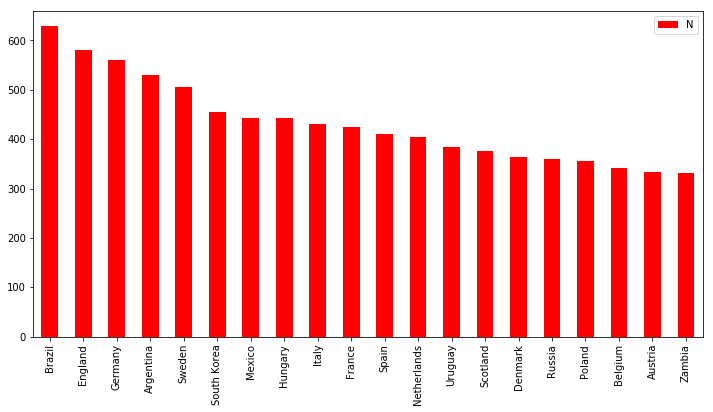

In [40]:
#Number of Wins
plt.figure(figsize=(12,6))
ax=total_wins.sort_values("Wins",ascending=False).iloc[:20,1].plot.bar(color="red")
ax.legend("Number of Wins")

Text(0, 0.5, 'Results')

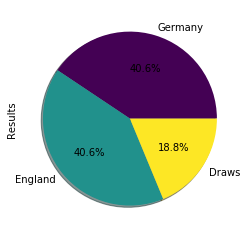

In [41]:
#Germany and England matches
temp=data[((data["home_team"]=="Germany") | (data["away_team"]=="Germany")) & ((data["home_team"]=="England") | (data["away_team"]=="England"))]["winner"].value_counts()
temp["Draws"]=data[((data["home_team"]=="Germany") | (data["away_team"]=="Germany")) & ((data["home_team"]=="England") | (data["away_team"]=="England"))]["draw"].value_counts().loc[True]
ax=temp.plot.pie(shadow=True,autopct="%.1f%%",cmap="viridis")
ax.set_ylabel("Results")

Text(0.5, 0, 'Team')

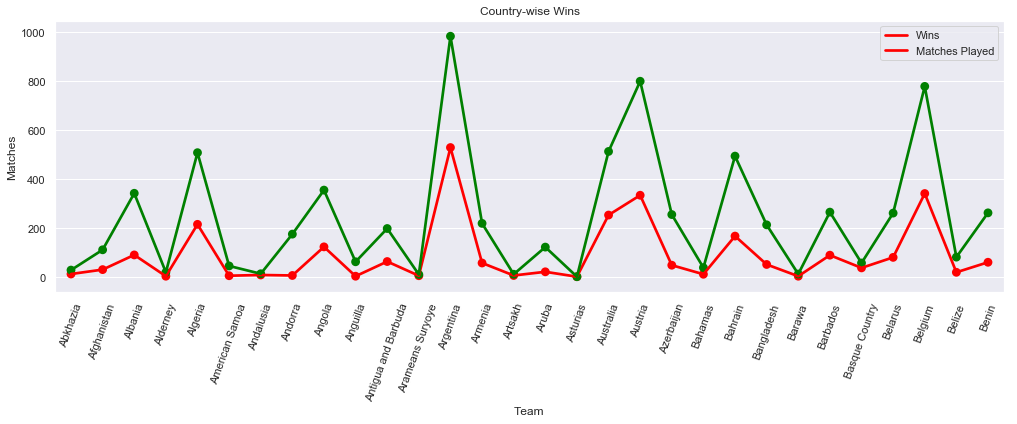

In [42]:
#Country-wise wins
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(17,5)})
sns.pointplot(x=total_wins.index[:30],y=total_wins["Wins"][:30],center=True,color="red")
sns.pointplot(x=total_wins.index[:30],y=total_wins["Matches"][:30],center=True,color="green")
plt.xticks(rotation=70)
plt.legend(labels=["Wins","Matches Played"])
plt.title("Country-wise Wins")
plt.xlabel("Team")

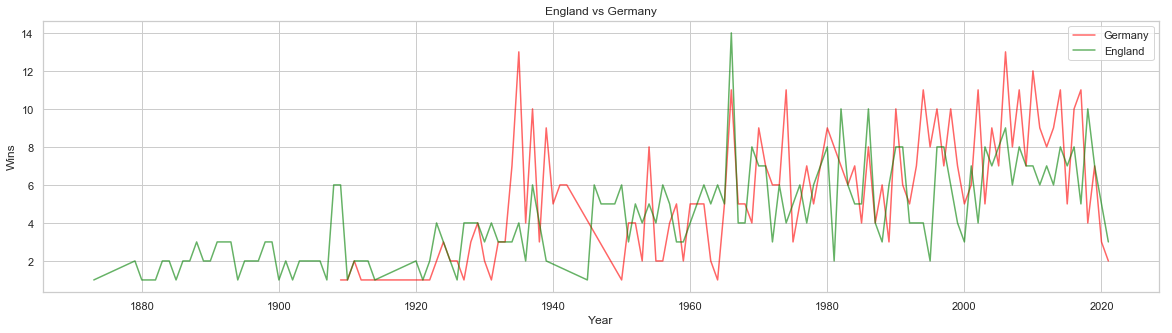

In [43]:
#England Vs Germany 
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
temp=data.groupby("year")["winner"].value_counts()
temp.loc[:,"Germany"].plot(color="red",alpha=0.6)
temp.loc[:,"England"].plot(color="green",alpha=0.6)
plt.xlabel("Year")
plt.ylabel("Wins")
plt.title("England vs Germany")
plt.legend(["Germany","England"])

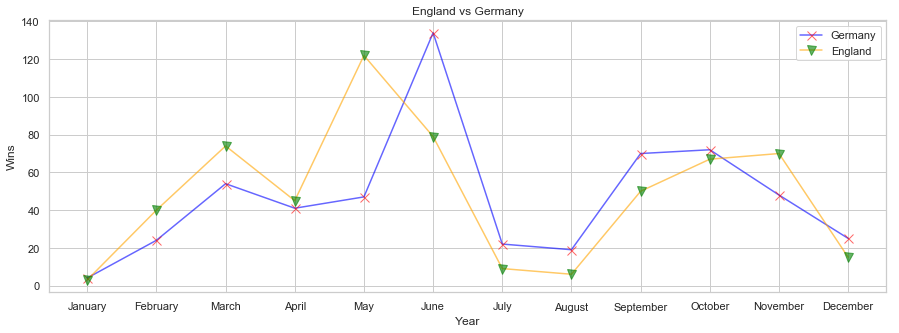

In [44]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
temp=data.groupby("month")["winner"].value_counts()
temp.loc[:,"Germany"].plot(color="blue",alpha=0.6,marker="x",markersize=9,markeredgecolor="red")
temp.loc[:,"England"].plot(color="orange",alpha=0.6,marker="v",markersize=9,markerfacecolor="green",markeredgecolor="green")
plt.xlabel("Year")
plt.ylabel("Wins")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],["January","February","March","April","May","June","July","August","September","October","November","December"])
plt.title("England vs Germany")
plt.legend(["Germany","England"])

Text(0.5, 1.0, 'Growth of Football')

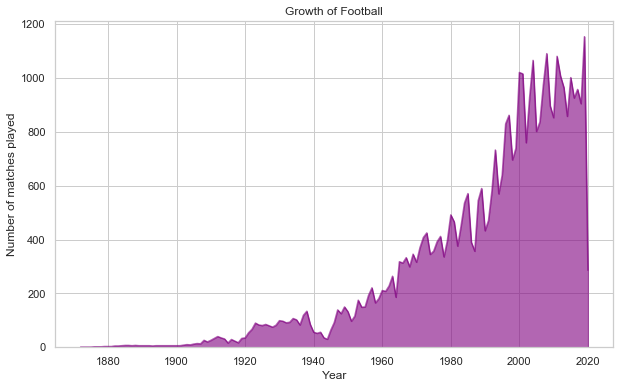

In [45]:
#Growth of Football
plt.figure(figsize=(10,6))
data.groupby("year")["home_team"].count()[:-1].plot.area(alpha=0.6,color="purple")
plt.xlabel("Year")
plt.ylabel("Number of matches played")
plt.title("Growth of Football")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

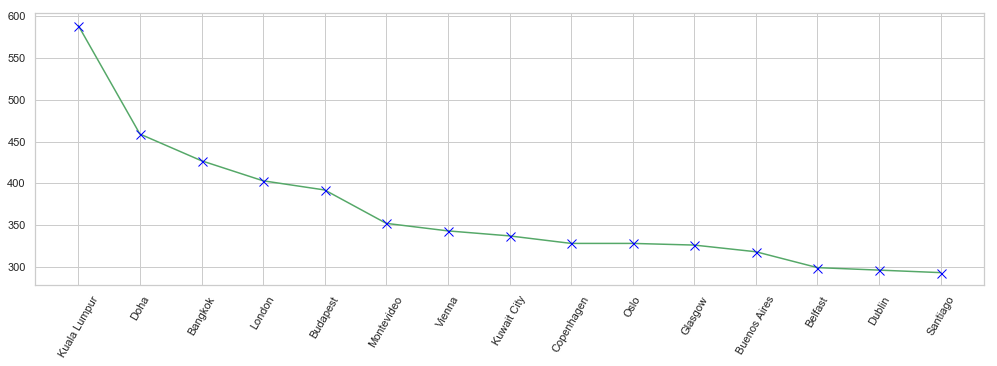

In [46]:
#Cities of matches played
plt.plot(data["city"].value_counts()[:15],"g-x",markersize=9,markeredgecolor="blue")
plt.xticks(rotation=60)


In [47]:
#Goal difference
data["goal_diff"]=data["home_score"]-data["away_score"]

In [48]:
#Maximum Goal difference 
temp4=data[(data["month"]==8) & (data["day"]==31)]
temp4[temp4["goal_diff"] == temp4["goal_diff"].max()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,draw,Win_Statues,year,month,day,goal_diff
10970,1979-08-31,Solomon Islands,Samoa,12,0,South Pacific Games,Suva,Fiji,True,Solomon Islands,Samoa,False,Win,1979,8,31,12


In [49]:
#Home team Germany
data[data["home_team"]=="Germany"][["away_team","home_score","away_score","goal_diff"]].sort_values(["goal_diff","home_score","away_score"],ascending=(True,True,False))[:10]

,away_team,home_score,away_score,goal_diff
1405,Austria,0,6,-6
3671,Hungary,3,8,-5
24279,England,1,5,-4
264,Belgium,0,3,-3
21393,Croatia,0,3,-3
26075,France,0,3,-3
29702,Czech Republic,0,3,-3
309,Hungary,1,4,-3
379,Denmark,1,4,-3
835,Sweden,1,4,-3


In [50]:
data[data["home_team"]=="Germany"][["away_team","home_score","away_score","goal_diff"]].sort_values(["goal_diff","home_score","away_score"],ascending=(False,False,True))[:10]

,away_team,home_score,away_score,goal_diff
2316,Finland,13,0,13
7117,Cyprus,12,0,12
19650,Liechtenstein,9,1,8
1983,Denmark,8,0,8
9623,Malta,8,0,8
11171,Malta,8,0,8
12053,Albania,8,0,8
24810,Saudi Arabia,8,0,8
40772,Estonia,8,0,8
1625,Belgium,8,1,7


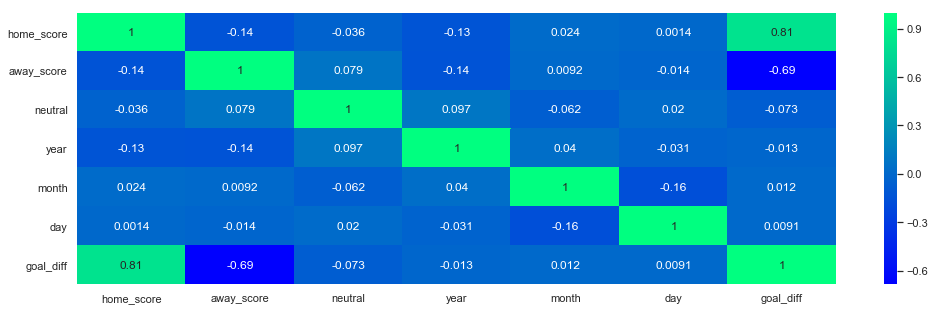

In [51]:
#Heatmap
sns.heatmap(data.corr(),cmap="winter",annot=True)

In [52]:
temp5=pd.DataFrame(columns=["away_team","home_score","away_score","goal_diff"])
for team in data["home_team"].unique()[:308]:
    temp5.loc[team]=data[data["home_team"] == team][["away_team","home_score","away_score","goal_diff"]].sort_values(["goal_diff","home_score","away_score"],ascending=(True,True,False)).iloc[0]
temp5=temp5.rename(columns={"away_team":"opp","home_score":"team_score","away_score":"opp_score"})    

In [53]:
temp6=pd.DataFrame(columns=["home_team","away_score","home_score","goal_diff"])
for team in data["away_team"].unique():
    temp6.loc[team]=data[data["away_team"] == team][["home_team","away_score","home_score","goal_diff"]].sort_values(["goal_diff","home_score","away_score"],ascending=(False,False,True)).iloc[0]
temp6["goal_diff"]=-temp6["goal_diff"] 
temp6=temp6.rename(columns={"home_team":"opp","away_score":"team_score","home_score":"opp_score"}) 

In [54]:
#Greatest Losses
loss=pd.DataFrame(columns=["opp","team_score","opp_score","goal_diff","text"])
for team in temp6.index:
    if team in temp5.index:
        if temp5.loc[team]["goal_diff"] > temp6.loc[team]["goal_diff"]:
            loss.loc[team]=temp6.loc[team]
        else:   
            loss.loc[team]=temp5.loc[team] 
    else:
        loss.loc[team]=temp6.loc[team] 
for team in temp5.index:
    if team in temp6.index:
        if temp5.loc[team]["goal_diff"] > temp6.loc[team]["goal_diff"]:
            loss.loc[team]=temp6.loc[team]
        else:   
            loss.loc[team]=temp5.loc[team]    
    else:
        loss.loc[team]=temp5.loc[team]         
            
            
for x in range(0,loss.shape[0]):
    loss.iloc[x,4]=str(loss.iloc[x,1])+"-"+str(loss.iloc[x,2])+" against "+loss.iloc[x,0]

In [55]:
data2=dict(type="choropleth",
          locations=loss.index,
          locationmode="country names",
          z=loss["goal_diff"],
          text=loss["text"],
          hoverinfo="text+location",
          colorbar={"title":"Goal Difference"},
          colorscale="viridis"
         )
lay=dict(title="Greatest Losses",geo={"scope":"world"})
iplot(go.Figure(data=[data2],layout=lay))

In [56]:
temp7=pd.DataFrame(columns=["away_team","home_score","away_score","goal_diff"])
for team in data["home_team"].unique()[:308]:
    temp7.loc[team]=data[data["home_team"] == team][["away_team","home_score","away_score","goal_diff"]].sort_values(["goal_diff","home_score","away_score"],ascending=((False,False,True))).iloc[0]
temp7=temp7.rename(columns={"away_team":"opp","home_score":"team_score","away_score":"opp_score"})

temp8=pd.DataFrame(columns=["home_team","away_score","home_score","goal_diff"])
for team in data["away_team"].unique():
    temp8.loc[team]=data[data["away_team"] == team][["home_team","away_score","home_score","goal_diff"]].sort_values(["goal_diff","home_score","away_score"],ascending=(True,True,False)).iloc[0]
temp8["goal_diff"]=-temp8["goal_diff"] 
temp8=temp8.rename(columns={"home_team":"opp","away_score":"team_score","home_score":"opp_score"}) 

In [57]:
#Greatest Wins
win=pd.DataFrame(columns=["opp","team_score","opp_score","goal_diff","text"])
for team in temp8.index:
    if team in temp7.index:
        if temp7.loc[team]["goal_diff"] < temp8.loc[team]["goal_diff"]:
            win.loc[team]=temp8.loc[team]
        else:   
            win.loc[team]=temp7.loc[team] 
    else:
        win.loc[team]=temp8.loc[team] 
for team in temp7.index:
    if team in temp8.index:
        if temp7.loc[team]["goal_diff"] < temp8.loc[team]["goal_diff"]:
            win.loc[team]=temp8.loc[team]
        else:   
            win.loc[team]=temp7.loc[team]    
    else:
        win.loc[team]=temp7.loc[team]         
            
            
for x in range(0,loss.shape[0]):
    win.iloc[x,4]=str(win.iloc[x,1])+"-"+str(win.iloc[x,2])+" against "+win.iloc[x,0]

In [58]:
data3=dict(type="choropleth",
          locations=win.index,
          locationmode="country names",
          z=win["goal_diff"],
          text=win["text"],
          hoverinfo="text+location",
          colorbar={"title":"Goal Difference"},
          colorscale="viridis_r"
         )
lay=dict(title="Greatest Wins",geo={"scope":"world"})
iplot(go.Figure(data=[data3],layout=lay))

In [59]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,draw,Win_Statues,year,month,day,goal_diff
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,NaN,True,Draw,1872,11,30,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,False,Win,1873,3,8,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,False,Win,1874,3,7,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,NaN,True,Draw,1875,3,6,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,False,Win,1876,3,4,3


In [60]:
#Home Conditions
#Convert the data set into 10 terms and findsout who has done best at each term 

range_years=max(years)-min(years)
no_0f_terms=10
term_size=int(range_years/no_0f_terms)
for i in range(no_0f_terms+1):
    start=years.index(term_size*i+min(years))
    end=years.index(min(term_size*(i+1)+min(years),2021))
    term=data.iloc[start:end]
    best_teams=pd.crosstab(term["home_team"], term["Win_Statues"],margins=True, margins_name="Total")
    
    ##Lets take teams which plays atleast 20 games
    best_teams["team_win_probability"]=best_teams["Win"]/(best_teams["Total"])
    best_teams=best_teams.sort_values("team_win_probability",ascending=False)
    best_teams=best_teams.loc[best_teams["Total"]>20]
    if (best_teams.shape[0]>2):
        print(f"\nBest 2 team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")
        print(best_teams.iloc[0:2].to_markdown())
    else:
        print(f"No Enough data to find the best team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")

No Enough data to find the best team in the term: 1872-1886 

Best 2 team in the term: 1886-1900 
| home_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| England     |      1 |      3 |    18 |      22 |               0.818182 |
| Scotland    |      3 |      3 |    16 |      22 |               0.727273 |

Best 2 team in the term: 1900-1914 
| home_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| England     |      6 |      1 |    14 |      21 |               0.666667 |
| Hungary     |      6 |      3 |    16 |      25 |               0.64     |

Best 2 team in the term: 1914-1928 
| home_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| Denmark     |      4 |      3 |    19 |      26 |       

In [61]:
#Away Conditions
##Convert the data set into 10 terms and findsout who has done best at each term 

range_years=max(years)-min(years)
no_0f_terms=10
term_size=int(range_years/no_0f_terms)
for i in range(no_0f_terms+1):
    start=years.index(term_size*i+min(years))
    end=years.index(min(term_size*(i+1)+min(years),2021))
    term=data.iloc[start:end]
    best_teams=pd.crosstab(term["away_team"], term["Win_Statues"],margins=True, margins_name="Total")
    
    ##Lets take teams which plays atleast 200 games
    best_teams["team_win_probability"]=best_teams["Lost"]/(best_teams["Total"])
    best_teams=best_teams.sort_values("team_win_probability",ascending=False)
    best_teams=best_teams.loc[best_teams["Total"]>20]
    print(f"\nBest 2 team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")
    if (best_teams.shape[0]>2):
        print(best_teams.iloc[0:2].to_markdown())
    else:
        print(f"No Enough data to find the best team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")


Best 2 team in the term: 1872-1886 
No Enough data to find the best team in the term: 1872-1886 

Best 2 team in the term: 1886-1900 
| away_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| Scotland    |      4 |     13 |     4 |      21 |               0.619048 |
| Total       |     11 |     30 |    44 |      85 |               0.352941 |

Best 2 team in the term: 1900-1914 
| away_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| England     |      6 |     18 |     4 |      28 |               0.642857 |
| Total       |     44 |     91 |   123 |     258 |               0.352713 |

Best 2 team in the term: 1914-1928 
| away_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| England     |      

Question 03

a)

In [62]:
import os
path = os.getcwd() + "\\results.csv"
df_match = pd.read_csv(path)
df_match.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [63]:
#Making a new colum named "Win_Statues" to store the result(Win,Lost,Draw) of the home team

conditions  = [df_match["home_score"] ==df_match["away_score"], df_match["home_score"] > df_match["away_score"] , df_match["home_score"] < df_match["away_score"]]
choices     = [ "Draw", 'Win', 'Lost' ]
df_match["Win_Statues"] = np.select(conditions, choices)
df_match.head(8)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Win
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,Win
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Lost
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,Lost


In [64]:
#Making a new dataset with required features to train the machine learning model
#Year,Played Country,Team_1,team_2,team_1 score,team_2 score

New_Dataset_part_1=pd.DataFrame(list(zip(years,df_match.values[:,7],df_match.values[:,1],df_match.values[:,2],df_match.values[:,3],df_match.values[:,4])),columns=["year","Country","team_1","team_2","team_1_score","team_2_score"])
#Making a new dataset by changing the team_1 and team_2 and their respective scores
New_Dataset_part_2=pd.DataFrame(list(zip(years,df_match.values[:,7],df_match.values[:,2],df_match.values[:,1],df_match.values[:,4],df_match.values[:,3])),columns=["year","Country","team_1","team_2","team_1_score","team_2_score"])
New_Dataset=pd.concat([New_Dataset_part_1,New_Dataset_part_2],axis=0)
New_Dataset =New_Dataset.sample(frac=1).reset_index(drop=True) #Shaffling the dataset
New_Dataset.head(5)

,year,Country,team_1,team_2,team_1_score,team_2_score
0,2004,Kuwait,Tajikistan,Kuwait,0,3
1,2004,Bulgaria,Bulgaria,Russia,2,2
2,2004,Jordan,Lebanon,Jordan,2,2
3,1989,Sint Maarten,British Virgin Islands,Sint Maarten,2,1
4,1994,United States,Romania,Sweden,2,2


In [65]:
#Creating a list containg all the names of the countries

teams_1=New_Dataset.team_1.unique()
contries=New_Dataset.Country.unique()
all_countries=np.unique(np.concatenate((teams_1,contries), axis=0))
len(all_countries)


344

,year,team_1_score,team_2_score
year,1.000000,-0.122901,-0.122901
team_1_score,-0.122901,1.000000,-0.158642
team_2_score,-0.122901,-0.158642,1.000000


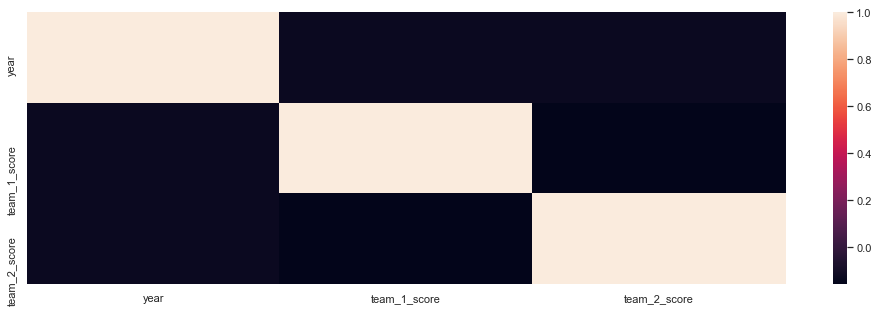

In [66]:
#Making a heatmap to see the correlation of each columns 

sns.heatmap(New_Dataset.corr())
New_Dataset.corr()

In [67]:
#Defining the features and labels(Targets)

Y= New_Dataset.iloc[:,4:6] #Training targets (team_1_score and team_2_score)
categorized_data=New_Dataset.iloc[:,0:4].copy() #Traing features

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#Labeling the data using LabelEncorder in Sklearn-(Giving a unique number to each string(country))

label_encoder.fit(all_countries)
#list(label_encoder.classes_)
categorized_data['team_1']=label_encoder.transform(categorized_data['team_1'])
categorized_data['team_2']=label_encoder.transform(categorized_data['team_2'])
categorized_data['Country']=label_encoder.transform(categorized_data['Country'])

#Converting these feature columns to categrize form to make the training processs more smoother
categorized_data['team_1']=categorized_data['team_1'].astype("category")
categorized_data['team_2']=categorized_data['team_2'].astype("category")
categorized_data['Country']=categorized_data['team_2'].astype("category")

In [68]:
#Input Fatures to the model (x)

categorized_data.head(5)


,year,Country,team_1,team_2
0,2004,156,293,156
1,2004,245,44,245
2,2004,149,162,149
3,1989,269,41,269
4,1994,286,244,286


In [69]:
#Targets to the model (Y)

Y.head(5)

,team_1_score,team_2_score
0,0,3
1,2,2
2,2,2
3,2,1
4,2,2


In [70]:
#Info about the X and Y dataframes

print(categorized_data.info())
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84064 entries, 0 to 84063
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   year     84064 non-null  int64   
 1   Country  84064 non-null  category
 2   team_1   84064 non-null  category
 3   team_2   84064 non-null  category
dtypes: category(3), int64(1)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84064 entries, 0 to 84063
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   team_1_score  84064 non-null  int64
 1   team_2_score  84064 non-null  int64
dtypes: int64(2)
memory usage: 1.3 MB
None


In [71]:
#Making the model

X=categorized_data
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Use any algorithm
model = MultiOutputRegressor(DecisionTreeClassifier())
model.fit(X,Y)

C:\Users\THARAKA\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\THARAKA\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\THARAKA\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle

MultiOutputRegressor(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
           n_jobs=None)

In [72]:
#Making the predictions

prd=model.predict(X)
prd

array([[0, 3],
       [2, 2],
       [2, 2],
       ...,
       [0, 2],
       [0, 2],
       [1, 0]], dtype=int64)

In [73]:
#Creating the Confusion matrix for each predictions

score_team_1=[i[0] for i in prd]
score_team_2=[i[1] for i in prd]

from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(list(Y.iloc[:,0]),score_team_1)
cm2=confusion_matrix(list(Y.iloc[:,1]),score_team_2)

Text(156.5, 0.5, 'Predicted')

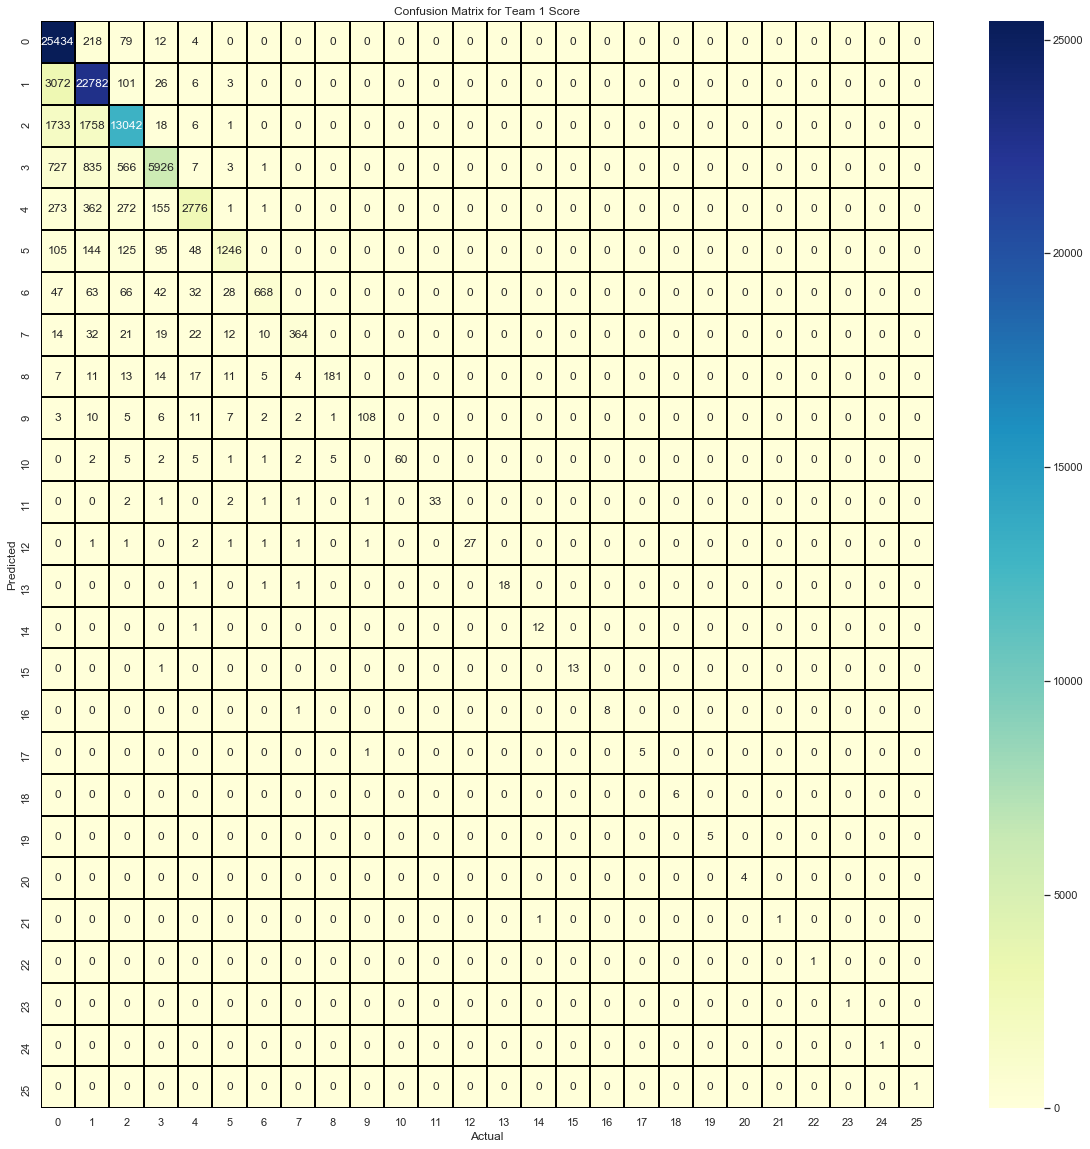

In [74]:
#Plotting the Confussion Matrix for score of team 01

plt.figure(figsize=(20,20))
sns.heatmap(cm1, annot=True,fmt="d", cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix for Team 1 Score")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [75]:
#Classification Report to team 1 Score

from sklearn.metrics import classification_report
report_1=classification_report(Y.iloc[:,0],score_team_1)
print(report_1)

#Has a good Accuracy in predicting the team 1 Score

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     25747
           1       0.87      0.88      0.87     25990
           2       0.91      0.79      0.85     16558
           3       0.94      0.73      0.82      8065
           4       0.94      0.72      0.82      3840
           5       0.95      0.71      0.81      1763
           6       0.97      0.71      0.82       946
           7       0.97      0.74      0.84       494
           8       0.97      0.69      0.80       263
           9       0.97      0.70      0.81       155
          10       1.00      0.72      0.84        83
          11       1.00      0.80      0.89        41
          12       1.00      0.77      0.87        35
          13       1.00      0.86      0.92        21
          14       0.92      0.92      0.92        13
          15       1.00      0.93      0.96        14
          16       1.00      0.89      0.94         9
          17       1.00    

Text(156.5, 0.5, 'Predicted')

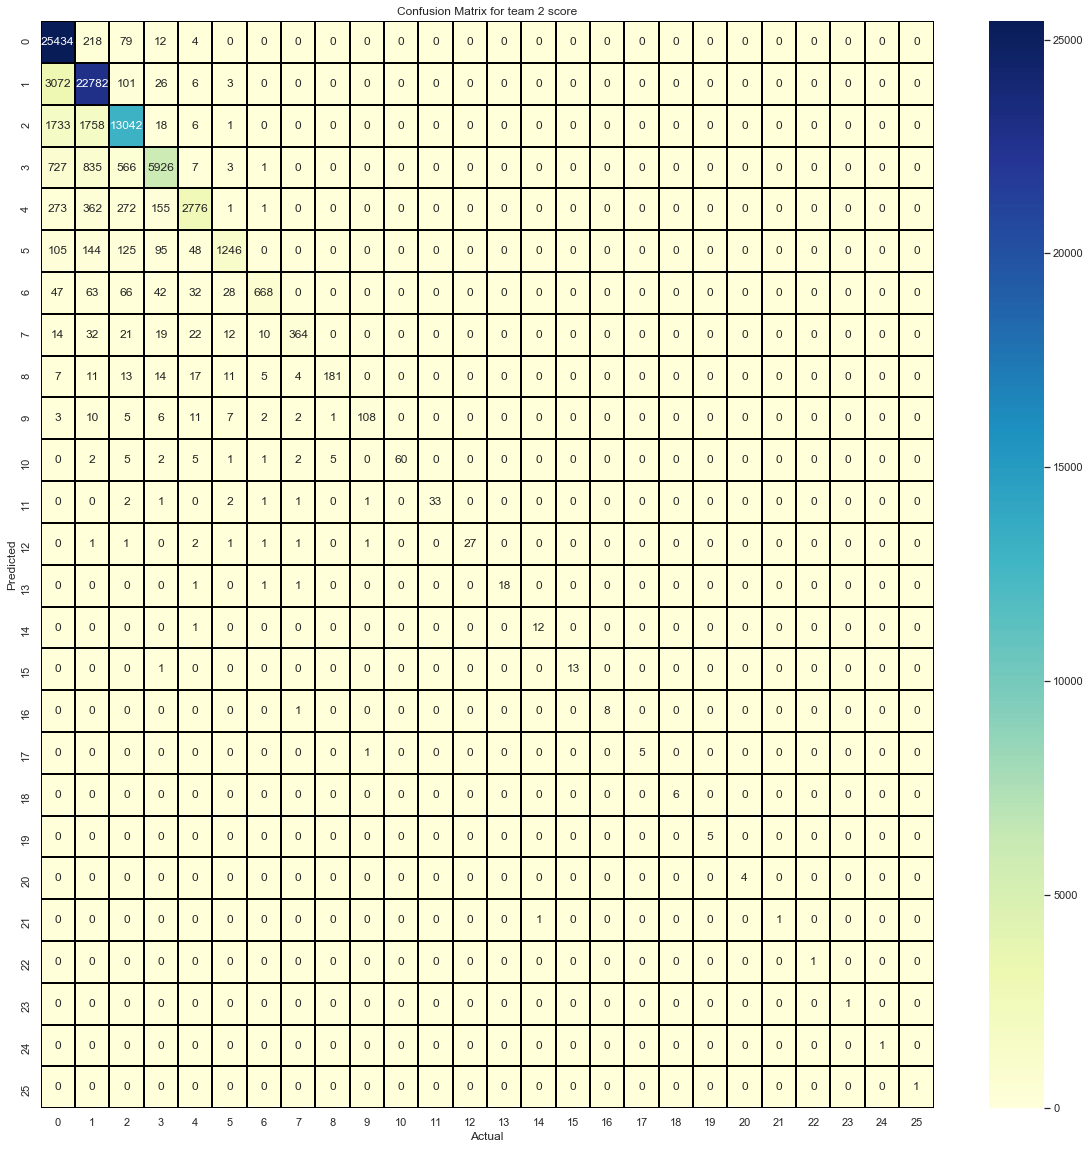

In [76]:
#Plotting the Confussion Matrix for score of team 02

plt.figure(figsize=(20,20))
sns.heatmap(cm2, annot=True,fmt="d", cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix for team 2 score")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [77]:
#Classification Report to team 2 Score

report_2=classification_report(Y.iloc[:,1],score_team_2)
print(report_2)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     25747
           1       0.87      0.88      0.87     25990
           2       0.91      0.79      0.85     16558
           3       0.94      0.73      0.82      8065
           4       0.94      0.72      0.82      3840
           5       0.95      0.71      0.81      1763
           6       0.97      0.71      0.82       946
           7       0.97      0.74      0.84       494
           8       0.97      0.69      0.80       263
           9       0.97      0.70      0.81       155
          10       1.00      0.72      0.84        83
          11       1.00      0.80      0.89        41
          12       1.00      0.77      0.87        35
          13       1.00      0.86      0.92        21
          14       0.92      0.92      0.92        13
          15       1.00      0.93      0.96        14
          16       1.00      0.89      0.94         9
          17       1.00    

Question 03)
b).

In [78]:
#Fuction to Select the winning team for the prediction array

def select_winning_team(probability_array):
    prob_lst=[round(probability_array[0][i],3) for i in range(2)]
    if (prob_lst[0]>prob_lst[1]):
        out=0
    elif (prob_lst[0]<prob_lst[1]):
        out=1
    elif (prob_lst[0]==prob_lst[1]):
        out=2
    return out,prob_lst

In [79]:
#Sample Prediction

mactch_played=2022
team_1="England"
team_2="Brazil"
team_3="Uruguay"
team_4="France"
team_5="Germany"
stadium="Qatar"

team_lst=[team_1,team_2]
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
stadium_num=label_encoder.transform([stadium])[0]

print(f"Team 01 is {team_1} - {team_1_num}")
print(f"Team 02 is {team_2} - {team_2_num}")
print(f"Played in  {stadium} - {stadium_num}")

team_2nd=[team_1,team_3]
team_1_num=label_encoder.transform([team_1])[0]
team_3_num=label_encoder.transform([team_4])[0]
stadium_num=label_encoder.transform([stadium])[0]

print(f"Team 01 is {team_1} - {team_1_num}")
print(f"Team 03 is {team_3} - {team_3_num}")
print(f"Played in  {stadium} - {stadium_num}")

team_3rd=[team_1,team_4]
team_1_num=label_encoder.transform([team_1])[0]
team_4_num=label_encoder.transform([team_4])[0]
stadium_num=label_encoder.transform([stadium])[0]

print(f"Team 01 is {team_1} - {team_1_num}")
print(f"Team 04 is {team_4} - {team_4_num}")
print(f"Played in  {stadium} - {stadium_num}")

team_4th=[team_1,team_5]
team_1_num=label_encoder.transform([team_1])[0]
team_5_num=label_encoder.transform([team_5])[0]
stadium_num=label_encoder.transform([stadium])[0]

print(f"Team 01 is {team_1} - {team_1_num}")
print(f"Team 05 is {team_5} - {team_5_num}")
print(f"Played in  {stadium} - {stadium_num}")

Team 01 is England - 91
Team 02 is Brazil - 39
Played in  Qatar - 237
Team 01 is England - 91
Team 03 is Uruguay - 102
Played in  Qatar - 237
Team 01 is England - 91
Team 04 is France - 102
Played in  Qatar - 237
Team 01 is England - 91
Team 05 is Germany - 112
Played in  Qatar - 237


In [80]:
#Sample Prediction Output

X_feature=np.array([[mactch_played,stadium_num,team_1_num,team_2_num]])
res=model.predict(X_feature)
win,_=select_winning_team(res)
try:
    print(f"{team_1} vs {team_2} \n {team_lst[win]} wins 🏆⚽🎯\n")
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽⚽\n") 

England vs Brazil 
 England wins 🏆⚽🎯



In [81]:
X_feature=np.array([[mactch_played,stadium_num,team_1_num,team_3_num]])
res=model.predict(X_feature)
win,_=select_winning_team(res)
try:
    print(f"{team_1} vs {team_3} \n {team_lst[win]} wins 🏆⚽🎯\n")
except IndexError:
    print(f"{team_1} vs {team_3} \n  Match Draw ⚽⚽⚽\n") 

England vs Uruguay 
 England wins 🏆⚽🎯



In [82]:
X_feature=np.array([[mactch_played,stadium_num,team_1_num,team_4_num]])
res=model.predict(X_feature)
win,_=select_winning_team(res)
try:
    print(f"{team_1} vs {team_4} \n {team_lst[win]} wins 🏆⚽🎯\n")
except IndexError:
    print(f"{team_1} vs {team_4} \n  Match Draw ⚽⚽⚽\n") 

England vs France 
 England wins 🏆⚽🎯



In [83]:
X_feature=np.array([[mactch_played,stadium_num,team_1_num,team_5_num]])
res=model.predict(X_feature)
win,_=select_winning_team(res)
try:
    print(f"{team_1} vs {team_5} \n {team_lst[win]} wins 🏆⚽🎯\n")
except IndexError:
    print(f"{team_1} vs {team_5} \n  Match Draw ⚽⚽⚽\n") 

England vs Germany 
 England wins 🏆⚽🎯



Question 03)
C).

In [84]:
Group_A= ["Uruguay","Germany","England","France","Brazil"]

Groups={"Group A":Group_A}

In [85]:
#Initialize basic parameters

year=2022
stadium="England"
stadium_num=label_encoder.transform([stadium])[0]
host_num=stadium_num

In [86]:
##Group stage Matches

Group_standings={}
for grp_name in list(Groups.keys()):
    print(f"{grp_name} Matches")
    probable_countries=Groups[grp_name]
    team_wins_dct={}
    goal_scored_dct={}
    goal_against_dct={}
    win_dct={}
    draw_dct={}
    lost_dct={}
    for i in range(len(probable_countries)):
        j=i+1
        team_1=probable_countries[i]
        team_1_num=label_encoder.transform([team_1])[0]
        team_wins=0
        while j<len((probable_countries)):
            team_2=probable_countries[j]
            team_2_num=label_encoder.transform([team_2])[0]
            team_lst=[team_1,team_2]
            Input_vector=np.array([[year,stadium_num,team_1_num,team_2_num]])
            res=model.predict(Input_vector)

            win,prob_lst=select_winning_team(res)
            goal_scored_dct[team_1] = goal_scored_dct.get(team_1,0)+prob_lst[0]
            goal_scored_dct[team_2] = goal_scored_dct.get(team_2,0)+prob_lst[1]
            
            goal_against_dct[team_1] = goal_against_dct.get(team_1,0)+prob_lst[1]
            goal_against_dct[team_2] = goal_against_dct.get(team_2,0)+prob_lst[0]
            
            try:
                print(f" {team_1} vs {team_2} \n  Results of the Match {res[0]}\n   {team_lst[win]} wins 🎊🏆⚽🎖️\n")
                if (win)==0:
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+2
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)
                    
                    win_dct[team_1] = win_dct.get(team_1,0)+1
                    win_dct[team_2] = win_dct.get(team_2,0)
                    lost_dct[team_2] = lost_dct.get(team_2,0)+1
                    lost_dct[team_1] = lost_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)

                elif (win)==1:
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+2
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)
                    
                    win_dct[team_2] = win_dct.get(team_2,0)+1
                    win_dct[team_1] = win_dct.get(team_1,0)
                    lost_dct[team_1] = lost_dct.get(team_1,0)+1
                    lost_dct[team_2] = lost_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)

            except IndexError:
                print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\n   Match Draw ⚽⚽⚽\n") 
                team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+1
                team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+1
                
                draw_dct[team_1] = draw_dct.get(team_1,0)+1
                draw_dct[team_2] = draw_dct.get(team_2,0)+1
                
                win_dct[team_1] = win_dct.get(team_1,0)
                lost_dct[team_1] = lost_dct.get(team_1,0)
                
                win_dct[team_2] = win_dct.get(team_2,0)
                lost_dct[team_2] = lost_dct.get(team_2,0)
                    
            j=j+1
    group_results=[win_dct,draw_dct,lost_dct,team_wins_dct,goal_scored_dct,goal_against_dct]
    Group_standings[grp_name]=group_results


Group A Matches
 Uruguay vs Germany 
  Results of the Match [2 3]
   Germany wins 🎊🏆⚽🎖️

 Uruguay vs England 
  Results of the Match [2 3]
   England wins 🎊🏆⚽🎖️

 Uruguay vs France 
  Results of the Match [2 3]
   France wins 🎊🏆⚽🎖️

Uruguay vs Brazil 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

 Germany vs England 
  Results of the Match [0 1]
   England wins 🎊🏆⚽🎖️

Germany vs France 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

 Germany vs Brazil 
  Results of the Match [3 0]
   Germany wins 🎊🏆⚽🎖️

 England vs France 
  Results of the Match [1 0]
   England wins 🎊🏆⚽🎖️

 England vs Brazil 
  Results of the Match [3 6]
   Brazil wins 🎊🏆⚽🎖️

 France vs Brazil 
  Results of the Match [3 6]
   Brazil wins 🎊🏆⚽🎖️



In [87]:
import tables

In [88]:
#Display group stage results

for grp_name in list(Group_standings.keys()):

    team_wins_dct= dict(sorted(Group_standings[grp_name][3].items()))
    goal_scored_dct=dict(sorted(Group_standings[grp_name][4].items()))
    goal_against_dct=dict(sorted(Group_standings[grp_name][5].items()))
    
    win_dct=dict(sorted(Group_standings[grp_name][0].items()))
    draw_dct=dict(sorted(Group_standings[grp_name][1].items()))
    lost_dct=dict(sorted(Group_standings[grp_name][2].items()))
    
    lst_teams=list(team_wins_dct.keys())
    
    win_lst=list(win_dct.values())
    draw_lst=list(draw_dct.values())
    lost_lst=list(lost_dct.values())
    
    lst_win_count=list(team_wins_dct.values())
    goal_scored=list(goal_scored_dct.values())
    goal_against=list(goal_against_dct.values())
    goal_differance=[goal_scored[i]-goal_against[i] for i in range (len(goal_scored))]
    ranking_table=pd.DataFrame(list(zip(lst_teams,win_lst,draw_lst,lost_lst,goal_scored,goal_against,goal_differance,lst_win_count)),columns=["Team","Wins","Draw","Lost","Goal Scored","Goal Against","Goal Differance","Points"])
    ranking_table=ranking_table.sort_values("Points",ascending=False).reset_index(drop=True)
    ranking_table.index = ranking_table.index + 1
    print(f"\n\n{grp_name} Final Rankings")
    print(ranking_table.to_markdown())



Group A Final Rankings
|    | Team    |   Wins |   Draw |   Lost |   Goal Scored |   Goal Against |   Goal Differance |   Points |
|---:|:--------|-------:|-------:|-------:|--------------:|---------------:|------------------:|---------:|
|  1 | England |      3 |      0 |      1 |             8 |              8 |                 0 |        6 |
|  2 | Brazil  |      2 |      1 |      1 |            12 |              9 |                 3 |        5 |
|  3 | Germany |      2 |      1 |      1 |             6 |              3 |                 3 |        5 |
|  4 | France  |      1 |      1 |      2 |             6 |              9 |                -3 |        3 |
|  5 | Uruguay |      0 |      1 |      3 |             6 |              9 |                -3 |        1 |


In this question, England has more chances to winning those matches. because hosting country can more impact for the winning the tournament. 